In [ ]:
print('Helloworld')

The below is a drawing of a random graph

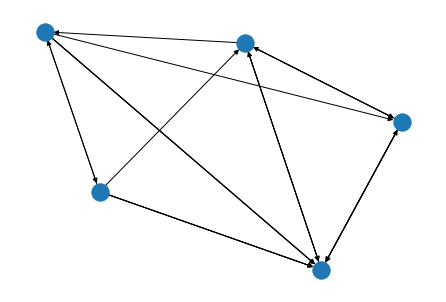

In [24]:
import networkx as nx
import numpy as np
import random
import math
import scipy

from networkx.algorithms import tournament
import matplotlib.pyplot as plt
#import matplotlib

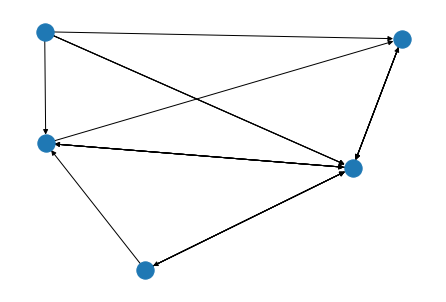

In [52]:
G = nx.random_k_out_graph(5,5,2)
pic = nx.draw_spring(G)
plt.show(pic)

draw a graph with node and edge labels. Note that we didn't need to import networkx again.

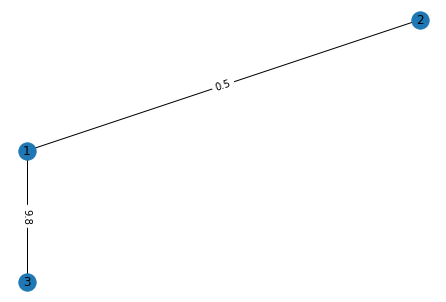

In [2]:
G=nx.Graph()
i=1
G.add_node(i,pos=(i,i))
G.add_node(2,pos=(2,2))
G.add_node(3,pos=(1,0))
G.add_edge(1,2,weight=0.5)
G.add_edge(1,3,weight=9.8)
pos=nx.get_node_attributes(G,'pos')
nx.draw(G, pos,with_labels=True)
labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.show()

next we'll compute shortest path in a weighted graph. 

In [3]:
H = nx.DiGraph()
H.add_nodes_from("ranju")
H.nodes()
nx.add_path(H,"ranju")
H.edges()
H.add_edge('a','j')
H['a']['j']['weight']=3
nx.dijkstra_path(H, 'a', 'j')

['a', 'n', 'j']

finally, we'll show how to label the nodes with some attributes, say "letters"

In [4]:
G = nx.random_k_out_graph(5,2,2)
letters = {0:'a', 1:'b', 2:'c', 3:'d', 4:'e'}
nx.set_node_attributes(G, letters, 'letter')
G.nodes(data = True)

NodeDataView({0: {'letter': 'a'}, 1: {'letter': 'b'}, 2: {'letter': 'c'}, 3: {'letter': 'd'}, 4: {'letter': 'e'}})

next we will make a directed grid graph

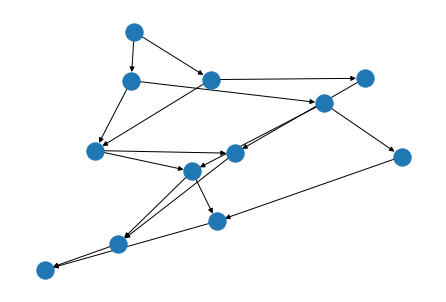

In [5]:
G = nx.grid_graph(dim=[4,3])
H = nx.DiGraph()
H.add_nodes_from(G.nodes())
H.add_edges_from(G.edges())
#B = H.reverse()
#H.add_edges_from(H.reverse().edges())
nx.draw(H)
plt.show()
#H.edges(), H.reverse().edges()

the next cell takes the tensor product of the directed grid graph with a single directed edge.

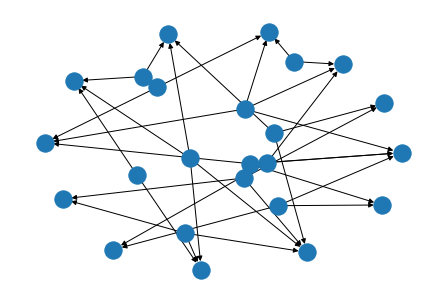

In [6]:
G = nx.grid_graph(dim=[4,3])
H = nx.MultiDiGraph()
H.add_nodes_from(G.nodes())
H.add_edges_from(G.edges())
H.add_edges_from(H.reverse().edges())
I = nx.MultiDiGraph()
I.add_node(0)
I.add_node(1)
I.add_edge(0,1)
B = nx.tensor_product(H,I)
nx.draw(B)
plt.show()
#B.edges()

The idea for the next couple of cells is to take some graphs (we'll make them randomly), and changes their keys to different things. Then it takes the tensor product and deletes all but the parts we are interested in.

Can maybe say something like G(1)...G(n) is the edge-sets. So the tensor product will be like 
(u,0)-(u,1) types. Can we just take the tensor product of G with a directed path? This should actually work.



Gets subgraph with attribute equal to given thing; the nodes of v should be of the form (i,j). I think that this is supposed to only keep the letters that appear in the word.

In [7]:
def letter_filter(G, filterlist):
    kept = []
    for v in G.nodes():
        if G.nodes[v]['letter'] in filterlist[v[1]]:
            kept.append(v)
    return kept
            
    

The next bit creates a random graph on the letters a a a b c *, and then tensors it with a directed path with letters 'abba'. To get the part we need, we just delete the bits where the letter from the graph doesn't match the letter from the path or is a star. The letter-letter edges get weighted 0, and the letter-* edges get weighted 1. Currently doesn't plot edge colors. Outputs the djikstra path. 

Big problem: can reuse vertices, which results in multiple labels

In [10]:
#G = nx.random_tournament(6)
G = nx.random_k_out_graph(6,6,2)
G_labels = word_to_dict('aabc*')
#letter is the name of the label.
nx.set_node_attributes(G, G_labels, 'letter')

word = 'aba'



def get_path(labeled_graph,word):

    GRAPHSIZE = labeled_graph.order()
    WORDLENGTH=len(word)
    path = nx.MultiDiGraph()
    nx.add_path(path,range(WORDLENGTH))
    word_dict = word_to_dict(word)
    nx.set_node_attributes(path, word_dict, 'letter')


    product_graph = nx.tensor_product(labeled_graph,path)

    # removes the vertices where letter doesn't match
    
    for v in list(product_graph.nodes):
        #print(B.nodes[v]['letter'][0])
        if not (product_graph.nodes[v]['letter'][0]==product_graph.nodes[v]['letter'][1] or product_graph.nodes[v]['letter'][0]=='*'):
            #print(B.nodes[v]['letter'][0]), print(B.nodes[v]['letter'][1])
            product_graph.remove_node(v)

            
    #weight the edges

    for e in list(product_graph.edges):
        product_graph.edges[e]['weight']=0
        if product_graph.nodes[e[0]]['letter'][0]=='*':
            product_graph.edges[e]['weight']= product_graph.edges[e]['weight']+1
        if product_graph.nodes[e[1]]['letter'][0]=='*':
            product_graph.edges[e]['weight']= product_graph.edges[e]['weight']+1

    #add source and sink
    
    product_graph.add_node('s')
    product_graph.add_node('t')
    for i in list(labeled_graph.nodes):
        if (i,0) in list(product_graph.nodes):
            product_graph.add_edge('s',(i,0))
        if (i,WORDLENGTH-1) in list(product_graph.nodes):
            product_graph.add_edge((i,WORDLENGTH-1),'t')




    dijkstra = nx.dijkstra_path(product_graph, 's', 't')
    original_path=[]
    for v in dijkstra:
        if v!='s' and v!='t':
            original_path.append(v[0])
    #make it into an actual path
    #print(original_path)
    P = nx.MultiDiGraph()
    nx.add_path(P,original_path)
    #gotta get the letters out


            
    return P
        
get_path(G,word)

Next, we need to update the crossword with the new path, and delete things that have been used too many times. For now, I think the simplest is to delete all edges in the path that was just added.

scratchwork: modify a weight:

In [11]:
G = nx.path_graph(3)
for e in list(G.edges):
    print(e[1])
    G.edges[e]['weight']=3
G.edges(data=True)

1
2


EdgeDataView([(0, 1, {'weight': 3}), (1, 2, {'weight': 3})])

scratchwork: modify a node position

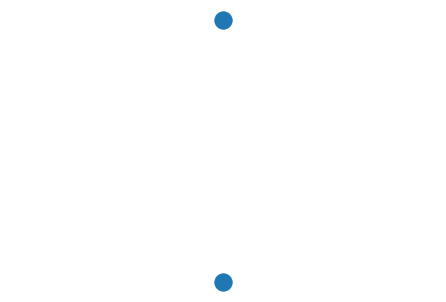

In [12]:
G = nx.Graph()
G.add_node((1,2))
G.add_node((1,3))
pos = {}
for v in list(G.nodes):
    pos[v]=v
#pos = {(1,2):(1,2), (1,3):(1,3)}
nx.draw(G,pos)

In [9]:
def word_to_dict(word):
    dictio = {}
    i =0
    for letter in word:
        dictio[i]=letter
        i = i + 1
    return dictio

word_to_dict('yep'), len('yep')

({0: 'y', 1: 'e', 2: 'p'}, 3)

**scratch:** right now, making an empty grid and putting "hello" into it. but I need to update the node labels still. can run get path only on letter_filter(H, word).

{(0, 0): Text(0.32301004159040697, 0.6441287483830697, 'h'),
 (0, 1): Text(0.6065309940706637, -0.069675421747333, 'b'),
 (0, 2): Text(0.683105846445856, -0.5478700579286311, '*'),
 (1, 0): Text(-0.34036518027233814, 0.7468158857036873, 'e'),
 (1, 1): Text(-0.05975128912963495, -0.020372122531822762, 'e'),
 (1, 2): Text(0.34146001169745943, -0.35727015343511326, '*'),
 (2, 0): Text(-0.805109448902412, 0.7895455006776596, 'l'),
 (2, 1): Text(-0.5035666609134758, -0.1853023791215157, 'l'),
 (2, 2): Text(-0.2453143145865242, -0.9999999999999999, 'o')}

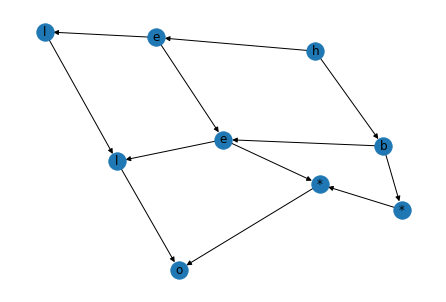

In [13]:
#make grid graph 
G = nx.grid_graph(dim=[3,3])
H = nx.MultiDiGraph()
H.add_nodes_from(G.nodes())
H.add_edges_from(G.edges())
#B = H.reverse()
#H.add_edges_from(H.reverse().edges())

#label all the nodes * initially
for v in list(H.nodes):
    H.nodes[v]['letter']='*'
#nx.draw(H, with_labels = True, data = True)
#H.nodes(data = True)


#get the path where the word goes,assigned by get_path
#P = nx.MultiDiGraph()
#P.add_path(get_path(H,"hello"))
word = "hello"
P = get_path(H,word)

i = 0
for v in list(P.nodes):
    #print(v)
    P.nodes[v]['letter']=word[i]
    i = i + 1
#nx.draw(P)

H=nx.compose(H,P)



H.remove_edges_from(list(P.edges()))
H.remove_edges_from(list(P.reverse().edges()))

#remove the edges occuring in P

#pos = nx.spring_layout(H)
#nx.draw(H, pos)
#node_labels = nx.get_node_attributes(H,'letter')
#nx.draw_networkx_labels(H, pos, labels = node_labels)


#try it again!

word = "bel"
P1 = get_path(H,word)

i = 0
for v in list(P1.nodes):
    #print(v)
    P1.nodes[v]['letter']=word[i]
    i = i + 1
#nx.draw(P)

#remove the edges occuring in P


H.remove_edges_from(list(P1.edges()))
H.remove_edges_from(list(P1.reverse().edges()))

H=nx.compose(H,P1)

H=nx.compose(H,P)



#yay!

#this next bit draws a graph with vertex labels
pos = nx.spring_layout(H)
nx.draw(H, pos)
node_labels = nx.get_node_attributes(H,'letter')
nx.draw_networkx_labels(H, pos, labels = node_labels)

#SADTIMES: because the nodes get reused in the djikstra path, I think b and l in bel get sent to same place.

#nx.draw(H, data = True)


#initially all *'s




the following is a way to give node vertices nice positions

In [14]:
    pos = {}
    for v in list(product_graph.nodes):
        pos[v]=v

    pos['s']=((GRAPHSIZE-1)/2, -1)
    pos['t']=((GRAPHSIZE-1)/2, WORDLENGTH)
    nx.draw(product_graph, pos, with_labels = True)

NameError: name 'product_graph' is not defined

**scratch**: biject a path with a word, then change attributes

{(0, 0): Text(0.4860287781143621, -0.8771953886980731, 'h'),
 (1, 0): Text(0.4902585858745511, -0.2327047520507577, 'e'),
 (2, 0): Text(0.3661646533485989, 0.3537266567819939, 'l'),
 (2, 1): Text(-0.34245201733751207, 0.4693816828078761, 'l'),
 (2, 2): Text(-0.9999999999999999, 0.2867918011589606, 'o')}

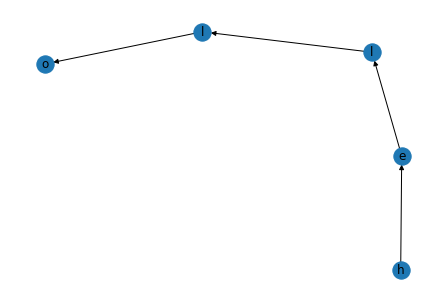

In [15]:
word = "hello"
i = 0
for v in list(P.nodes):
    #print(v)
    P.nodes[v]['letter']=word[i]
    i = i + 1
    
#this next bit draws a graph with vertex labels
pos = nx.spring_layout(P)
nx.draw(P, pos)
node_labels = nx.get_node_attributes(P,'letter')
nx.draw_networkx_labels(P, pos, labels = node_labels)
#edge_labels = nx.get_edge_attributes(P,'state')
#nx.draw_networkx_edge_labels(G, pos, labels = edge_labels)
    
#nx.draw(P,data = True)

**Idea**: use edge labels (rather than colors) initially to distinguish the edges.

**Crossword:** Take an initial starting graph, and a list of words, use the greedy method to put the words into the graph. Outputs graph with letters in and the dict of paths that the words correspond to. 

In [304]:
#F should be an acyclic multidigraph
#wordlist a list of strings

def crossword(F, wordlist,max_iter=20):
    nopath=True
    for v in list(F.nodes):
        F.nodes[v]['letter']='*'
    iter=0
    while nopath and iter < max_iter:
        iter+=1
        G = F.copy()
        wordlist = np.random.permutation(wordlist)
        pathdict = {}
        
        #for the first word, try deleting a bunch of nodes of G
        H = G.copy()
        PERCENTAGE = 0.5
        H.remove_nodes_from(random.sample(list(H.nodes),math.floor(G.order()*PERCENTAGE)))
        firstword = wordlist[0]
        try: 
            path = get_path(H,firstword)
        except nx.NetworkXNoPath:
            nopath=True
            continue  
        i = 0
        for v in list(path.nodes):
            path.nodes[v]['letter']=firstword[i]
            i = i + 1
        pathdict[firstword]=path
        G = nx.compose(G,path)
        #print(pathlist)
        G.remove_edges_from(list(path.edges()))
        wordlist = wordlist[1:]

    
        for word in wordlist:
            #get the path. if there is none, just start over
            #when we start over we need to copy.
            #could have some "dropout" to enforce randomness.
            try: 
                path = get_path(G,word)
            except nx.NetworkXNoPath:
                nopath=True
                break
            nopath=False
            i = 0
            for v in list(path.nodes):
                path.nodes[v]['letter']=word[i]
                i = i + 1
            pathdict[word]=path
            G = nx.compose(G,path)
            #print(pathlist)
            G.remove_edges_from(list(path.edges()))
        
        if nopath:
            continue
            
        for path in pathdict.values():
            G = nx.compose(G,path)
        
    return G,pathdict
        


The below is probably broken at this point

In [283]:
G = nx.grid_graph(dim=[6,6])
H = nx.MultiDiGraph()
H.add_nodes_from(G.nodes())
H.add_edges_from(G.edges())

words = ["poop","dog","cog"]

G,pathlist = crossword(H,words)

pos = {}
for v in list(G.nodes):
    pos[v]=v

#pos = nx.spring_layout(G)
#print(pos)
nx.draw(G, pos)
node_labels = nx.get_node_attributes(G,'letter')
nx.draw_networkx_labels(G, pos, labels = node_labels,font_color='w')


IndexError: index 0 is out of bounds for axis 0 with size 0

delete 10 random nodes of a graph

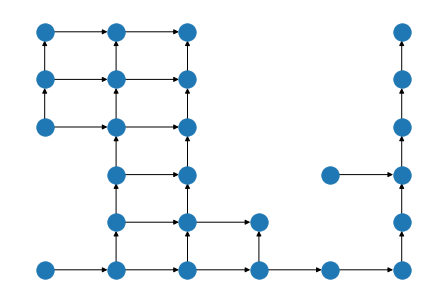

In [18]:
G.remove_nodes_from(random.sample(list(G.nodes),10))
nx.draw(G,pos)

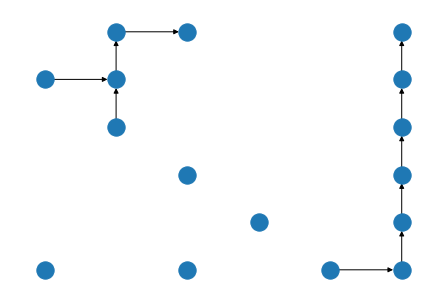

In [19]:
H = G.copy()
H.remove_nodes_from(random.sample(list(H.nodes),10))
nx.draw(H,pos)

draw a sequence of graphs with different colors, also node using a cmap

KeyError: (0, 6)

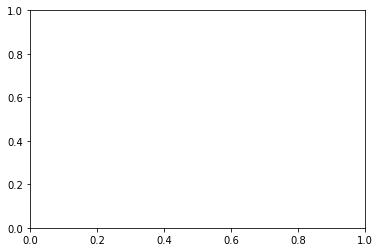

In [22]:
H = G.copy()
H.remove_nodes_from(random.sample(list(H.nodes),10))
F = G.copy()
F.remove_nodes_from(random.sample(list(F.nodes),10))
nx.draw_networkx_edges(H,pos,edge_color='r')
nx.draw_networkx_edges(F,pos,edge_color='b')
nx.draw_networkx_nodes(G,pos,node_color = range(49),cmap=plt.cm.viridis)
plt.show()

makes a crossword with the list called words on the $7 \times 7$ grid graph. Also has functionality for clues.

In [129]:
def simple_grid_crossword_old(clues, n,m):
    G = nx.grid_graph(dim=[n,m])
    H = nx.MultiDiGraph()
    H.add_nodes_from(G.nodes())
    H.add_edges_from(G.edges())
    
    G,pathdict = crossword(H,list(clues.keys()))
    #really this should catch the "no path" error.
    
    #set position as vertex name; this only makes sense for grid graph.

    pos = {}
    for v in list(G.nodes):
        pos[v]=v

    #pos = nx.spring_layout(G)
    #print(pos)
    
    
    i=0
    cmap = plt.cm.get_cmap('Dark2')
    nodemap = plt.cm.get_cmap('Blues')
    span = len(pathdict.values())
    fig1 = plt.figure(1)
    plt.axis("off")
    fig2 = plt.figure(2)
    plt.axis("on")
    clue_fig = plt.figure(figsize = (2,len(pathdict)+2))
    for word in pathdict.keys():
        #switch to graph figure 
        plt.figure(2)
        nx.draw_networkx_edges(pathdict[word],pos,edge_color = matplotlib.colors.to_hex(cmap(i/span)))
        nx.draw_networkx_edges(pathdict[word],pos,edge_color = matplotlib.colors.to_hex(cmap(i/span)))
        nx.draw_networkx_nodes(pathdict[word],pos,node_color = matplotlib.colors.to_hex(nodemap(.1)))
        
        #switch to clue figure
        plt.figure(1)
        
        #print(list(pathdict[word].nodes()), word)
        #read from the bottom 
        
        clues[word].append(list(pathdict[word].nodes())[0])
        plt.text(0,2*i/len(pathdict),clues[word][0] + ": " + str(clues[word][1]),color = matplotlib.colors.to_hex(cmap(i/span)),fontsize=20)
        i = i + 1
    
    #need to do better to color in a non-interacting way
    
    return fig1,fig2
    

In [318]:
def simple_grid_crossword(clues, n,m):
    G = nx.grid_graph(dim=[n,m])
    H = nx.MultiDiGraph()
    H.add_nodes_from(G.nodes())
    H.add_edges_from(G.edges())
    
    G,pathdict = crossword(H,list(clues.keys()))
    
    #set position as vertex name; this only makes sense for grid graph.

    pos = {}
    for v in list(G.nodes):
        pos[v]=v
    
    #could also do spring layout
    #pos = nx.spring_layout(G)
    #print(pos)
    
    
    i=0
    cmap = plt.cm.get_cmap('Dark2')
    nodemap = plt.cm.get_cmap('Blues')
    span = len(pathdict.values())

    fig, axes = plt.subplots(1,2,figsize=(10,5),sharey=True)
    

    axes[0].plot()
    
    #plot the graph 

    for word in pathdict.keys():

        nx.draw_networkx_edges(pathdict[word],pos,edge_color = matplotlib.colors.to_hex(cmap(i/span)),ax=axes[0])
        nx.draw_networkx_edges(pathdict[word],pos,edge_color = matplotlib.colors.to_hex(cmap(i/span)),ax=axes[0])
        nx.draw_networkx_nodes(pathdict[word],pos,node_color = matplotlib.colors.to_hex(nodemap(.1)),ax=axes[0])
        i = i + 1
    plt.axis("on")
    axes[0].tick_params(left=True, bottom=True, labelleft=True, labelbottom=True)

    
    #plot clues
    i = 0

    axes[1].plot()
    plt.axis("off")
    for word in pathdict.keys():
        
        clues[word].append(list(pathdict[word].nodes())[0])
        plt.text(0,(m-1)*i/len(pathdict),clues[word][0] + ": " + str(clues[word][1]),color = matplotlib.colors.to_hex(cmap(i/span)),fontsize=20)
        i = i + 1
    
    #need to do better to color in a non-interacting way
    
    return fig

<Figure size 432x288 with 0 Axes>

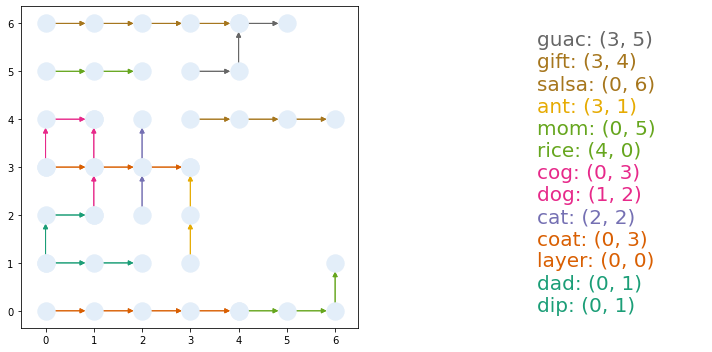

In [319]:
#test out our grid_crossword_plotter.
plt.clf()
words = ["rice","dog","cog","gift","lore","ant","cat","dad","mom", "guac","coat","salsa","layer","dip"]

#for now, clues are simply the answer

clues = {}
for word in words:
    clues[word]=[]
    clues[word].append(word)

fig = simple_grid_crossword(clues,7,7)

#plt.show()

fig.tight_layout()

In [64]:
fig = plt.figure(figsize = (2,2))
plt.text(0,0,"hello",color='red',fontsize=20)
plt.text(0,.5,"nope",color="blue",fontsize=20)
plt.axis("off")

AttributeError: 'Figure' object has no attribute 'axis'

<Figure size 144x144 with 0 Axes>

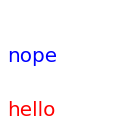

In [63]:
fig

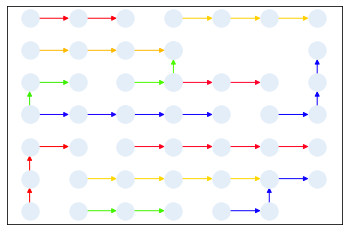

{'rice': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd40527d00>, 'dad': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd40527dc0>, 'dog': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd40527d30>, 'coat': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd40527fa0>, 'mom': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd20088700>, 'dip': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd40527be0>, 'cog': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd40527ee0>, 'layer': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd306fe130>, 'salsa': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd40527d90>, 'lore': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd40527f40>, 'cat': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd405277f0>, 'gift': <networkx.classes.multidigraph.MultiDiGraph object at 0x7fdd405274f0>, 'ant': <networkx.classes.multidigraph.MultiDiGraph obje

{'rice': ['rice', (1.0, 0.0, 0.0, 1.0), (0, 0)],
 'dog': ['dog', (0.2280405192384154, 0.9359470417164775, 0.0, 1.0), (0, 3)],
 'cog': ['cog', (0.2607461041404445, 0.9584992034392541, 0.0, 1.0), (1, 0)],
 'gift': ['gift', (1.0, 0.8155032865958014, 0.0, 1.0), (3, 6)],
 'lore': ['lore', (0.05177454831811079, 0.0, 1.0, 1.0), (4, 0)],
 'ant': ['ant', (1.0, 0.0, 0.1740853847346898, 1.0), (3, 4)],
 'cat': ['cat', (0.29459996837203795, 0.9792879301617472, 0.0, 1.0), (2, 4)],
 'dad': ['dad', (0.10014583563595647, 0.0, 1.0, 1.0), (0, 3)],
 'mom': ['mom', (1.0, 0.0, 0.0582462106923429, 1.0), (0, 6)],
 'guac': ['guac', (0.030158059112426527, 0.0, 1.0, 1.0), (5, 3)],
 'coat': ['coat', (1.0, 0.7236450504548504, 0.0, 1.0), (0, 5)],
 'salsa': ['salsa', (1.0, 0.0, 0.11632899491412466, 1.0), (2, 2)],
 'layer': ['layer', (1.0, 0.8450918051812084, 0.0, 1.0), (1, 1)],
 'dip': ['dip', (0.07512564656323162, 0.0, 1.0, 1.0), (2, 3)]}

In [26]:
G = nx.grid_graph(dim=[7,7])
H = nx.MultiDiGraph()
H.add_nodes_from(G.nodes())
H.add_edges_from(G.edges())

words = ["rice","dog","cog","gift","lore","ant","cat","dad","mom", "guac","coat","salsa","layer","dip"]

#make dict that clues. eventually want to print the clue along with the first vertex and the color.
#probably the keys to the clue dictionary should be the words and the elements should be tuples of 
#clue, starting point, color.

#right now the clue is just the word
clues = {}
for word in words:
    clues[word]=[]
    clues[word].append(word)
    
    

G,pathdict = crossword(H,words)

pos = {}
for v in list(G.nodes):
    pos[v]=v

#pos = nx.spring_layout(G)
#print(pos)

i=0
cmap = plt.cm.get_cmap('prism')
nodemap = plt.cm.get_cmap('Blues')
span = len(pathdict.values())
for word in pathdict.keys():
    nx.draw_networkx_edges(pathdict[word],pos,edge_color = matplotlib.colors.to_hex(cmap(i/span)))
    clues[word].append(cmap(i/span))
    clues[word].append(list(pathdict[word].nodes())[0])
    i = i + 1
    nx.draw_networkx_nodes(pathdict[word],pos,node_color = matplotlib.colors.to_hex(nodemap(.1)))

#nx.draw_networkx_labels(G,pos)

plt.show()

print(pathdict)

clues


# New Attempt: splitting
Plan:
1. Make the fully saturated graph (naively, each word is the obvious path on the alphabet). This causes some problems because the path will have cycles. Maybe cycles could even be fun - but idk. I think the fully saturated graph should just be defined by duplicating each letter the max number of times it appears in any word. Equivalently, one can just make a new letter for it when it appears (a can become a1, a2, a3). 
2. Make a routine to split an initial graph until it has no vertices of degree higher than 4. There are various options - one might try to even choose a splitting to maximize embeddability.
3. Choose an embedding. I am thinking Tutte or spectral. Perhaps even a 3d embedding might be nice, or choosing a nice 3d embedding and then projecting it randomly. 

**Making the saturated graph:**
I think it makes sense to add each word to the graph as a path. The word "bob" would become the path [b,0], [o,0], [b,1].

In [2]:
def sat_dict(word):
    WORDLENGTH=len(word)
    word_dict = {}
    count = {}
    for letter in word:
        count[letter] = 0
    for letter in word:
        
        word_dict[letter + str(count[letter])]=letter
        count[letter]= count[letter] + 1
    
    return word_dict
        
    #path = nx.MultiDiGraph()
    #path.add_path(range(WORDLENGTH))
    #word_dict = word_to_dict(word)
    #nx.set_node_attributes(path, word_dict, 'letter')

In [3]:
list(sat_dict("bob").keys())

['b0', 'o0', 'b1']

In [4]:
def sat_graph(wordlist):
    G = nx.MultiDiGraph()
    paths = []
    for word in wordlist:
        #print(word)
        path = nx.MultiDiGraph()
        word_dict = sat_dict(word)
        #print(list(word_dict.keys()))
        nx.add_path(path,word_dict.keys())
        nx.set_node_attributes(path, word_dict, 'letter')
        paths.append(path)
        G = nx.compose(G,path)
        #path = sat_path(word)
        #word_dict = word_to_dict(word)
        #nx.set_node_attributes(path, word_dict, 'letter')
        #paths.append(sat_path(word))
        #G.add_path(path)
    return G, paths
    
    
        

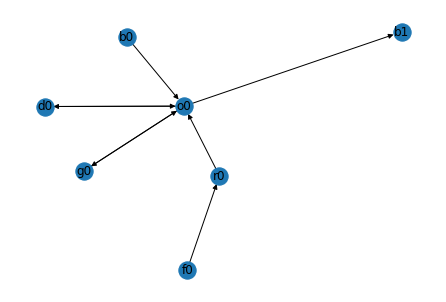

In [5]:
R, paths = sat_graph(["bob", "dog", "god", "frog"])
#list(R.nodes)
#nx.draw_spring(paths[0])

pos1 = nx.spring_layout(R)
#pos
nx.draw(R,pos1, with_labels=True)
#node_labels1 = nx.get_node_attributes(R,'letter')
#node_labels
#nx.draw_networkx_labels(R, pos1, labels = node_labels1)

**Splitting procedure**: so far, what we have to work with is the saturated graph and the list of paths. 
1. take random degree > 4 vertex, add roughly d/4 new vertices and reroute paths accordingly.
2. figure out which paths go through the vertex; remove those.
3. randomly pair up the 1's, then randomly group together the 2's (Could imagine doing this much better).
4. Make a new vertex for each degree ~4 clump, change the corresponding vertex name in each path, then add back to graph. Repeat.

A thought - couldn't I just kinda do this from the beginning? Unless I have a condition for the "planarity" or density that I am maximizing, I don't really need to know anything. Could just make an appropriate number of a0,a1,etc. just using pigeonhole. I think this is similar to what I did the very first time. But maybe I should do it this way in case there ***is*** a quantity I can try to improve upon.
    

In [6]:
#takes in the graph v, list of paths, 
#extracts only the ones going through v.
def get_paths(G,paths,v):
    containers = []
    for p in paths:
        if v in list(p.nodes):
            containers.append(p)
    return containers

In [7]:
def path_degree(paths,v):
    count = 0
    for p in paths:
        if v in list(p.nodes):
            count+=p.degree(v)
    return count

In [8]:
def degree_sort(paths, v):
    deg_dict = {}
    for path in paths:
        deg_dict[path]=path.degree(v)
    return deg_dict

**Simplesplit:** the simplest possible splitting would be to just touch two words to every vertex. Doesn't mean they have degree 4 necessarily. 

In [9]:
def simple_split(paths, v):
    #randomly sort.
    num = 0
    paths1 = []
    for path in paths:
        paths1.append(nx.relabel_nodes(path,{v:v[:-1] + str(int(np.floor(num/2)))}))
        if v in list(path.nodes):
            num+=1

    return paths1
            

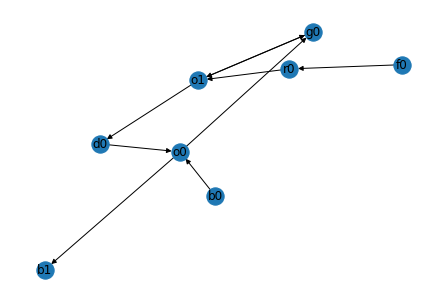

In [10]:
paths1 = simple_split(paths,"o0")

H = nx.MultiDiGraph()
for path in paths1:
    H = nx.compose(H,path)

pos = nx.spring_layout(H)
#pos
nx.draw(H,pos, with_labels=True)

this next function should take in a dictionary with numbers as keys, and other numbers as targets. 

Eventually we should really like to get all the containers for all the bad vertices, brute force over all valid functions.

Because $4n = 2m$, the number of vertices will be at least half the number of edges, $\frac{1}{2}\sum (l_w - 1)$. In splitting one of the 26 initial vertices into $p$ new vertices, there will also be about $2p$ paths touching them. Relabeling the vertices are equivalent, so the number of choices is about $(2p)!/(2^p p!)$. Let's call it $\sqrt{4\pi p}(2p/e)^{2p}/(2^p \sqrt{2\pi p} (p/e)^p = \sqrt{2}  (2p/e)^{p} = e^{p (\ln p + \ln 2 - 1) + \ln \sqrt{2}}$. The exponent is convex; is maximized when as uneven as possible. If you have 100 sites, you probably have 5 e's. That's already 25 nats; yeesh. The number of nats is certainly at least the number of sites. Just do some really silly heuristic to ditch a few bits?

In [11]:
def split_functions(containers,v,split_mapping):
    containers1 = []
    for path in containers:
        #print(list(path.nodes))
        containers1.append(nx.relabel_nodes(path,{v:split_mapping[path]}))
        #print(list(path.nodes))
    return containers1


    

In [17]:
conts = get_paths(R,paths,"o0")


sm = {}
sm[conts[0]]="o1"
sm[conts[1]]="o1"
sm[conts[2]]="o2"
sm[conts[3]]="o2"


conts_split = split_functions(conts, "o0",sm)

G = nx.MultiDiGraph()
for path in conts_split:
    G = nx.compose(G,path)

pos = nx.spring_layout(G)
#pos
nx.draw(G,pos, with_labels=True)



NameError: name 'R' is not defined

In [14]:
pos1 = nx.spring_layout(R)
#pos
nx.draw(R,pos1, with_labels=True)

NameError: name 'R' is not defined

In [12]:
def split(G, paths, v):
    #get a random subset to choose which ones to reroute.
    #some will be degree 2 and some degree 1 in the path
    #idea should be to get as even a split as possible. Could try to do things smartly...
    #try to split the entire thing. algorithm is to randomly pair up the 1's. two 3's better than a 2 and a 4.
    #should be able to get 
    

SyntaxError: unexpected EOF while parsing (<ipython-input-12-c61509188d4b>, line 7)

In [13]:
def split(G,paths):
    H = nx.MultiDiGraph()
    for v in list(G.nodes):
        if path_degree(paths,v)> 4:
            paths = simple_split(paths,v)
            #print("yes")
    H = nx.MultiDiGraph()
    for path in paths:
        H = nx.compose(H,path)
    return H, paths
    
 

5
8


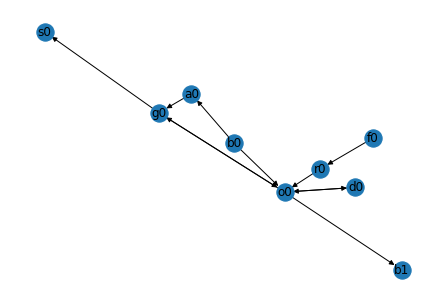

In [15]:
R, paths = sat_graph(["bob", "dog", "god", "frog", "bags"])
print(path_degree(paths,"g0"))
print(path_degree(paths,"o0"))


S, paths1 = split(R,paths)

pos = nx.spring_layout(R)


pos1 = nx.spring_layout(S)
#pos
nx.draw(R,pos, with_labels=True)
#nx.draw(S,pos1, with_labels=True)



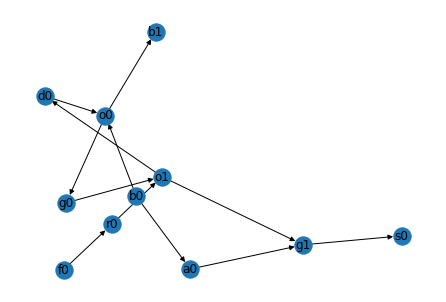

In [16]:
#nx.draw_spring(S)
nx.draw(S,pos1, with_labels=True)

In [17]:
def draw_colorfully(graphy, paths):
    #pos = nx.spectral_layout(graphy)
    pos = nx.kamada_kawai_layout(graphy)
    #pos = nx.shell_layout(graphy)

    nodemap = plt.cm.get_cmap('Blues')

    nx.draw_networkx_nodes(graphy,pos,node_size = 50,node_color = matplotlib.colors.to_hex(nodemap(.1)),with_labels=True)
    #nx.draw_networkx_nodes(graphy,pos,with_label=True)
    #nx.get_node_attributes(R
    #nx.draw_networkx_labels(R, pos1, labels = node_labels1)
    nx.draw_networkx_labels(graphy, pos, font_size = 6)

    cmap = plt.cm.get_cmap('prism')
    i = 0
    span = len(paths)
    for path in paths:
        nx.draw_networkx_edges(path,pos,edge_color = matplotlib.colors.to_hex(cmap(i/span)))
        i+=1
    plt.savefig("graph.pdf")
    plt.show()


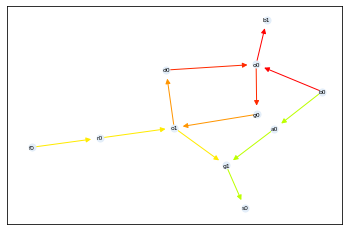

In [18]:
draw_colorfully(S,paths1)

In [19]:
 G = nx.path_graph(3)
sorted(G)
mapping = {1: 'b', 2: 'c'}
H = nx.relabel_nodes(G, mapping)
list(H.nodes)

[0, 'b', 'c']

In [ ]:
np.floor(5/2)

In [20]:
def random_crossword(words):
    G, paths = sat_graph(words)
    G, paths = split(G,paths)
    return G, paths

In [22]:

from english_words import english_words_lower_alpha_set
import random

In [23]:
'ghost' in english_words_lower_alpha_set

True

In [24]:
words = random.sample(english_words_lower_alpha_set, 30)
words

['kampala',
 'grab',
 'obtrude',
 'malnutrition',
 'hibernate',
 'songbird',
 'kangaroo',
 'opus',
 'spectrograph',
 'deuce',
 'main',
 'stumble',
 'sally',
 'respirator',
 'fischer',
 'fowl',
 'broil',
 'solicitude',
 'faraday',
 'theft',
 'pursuant',
 'daydream',
 'azores',
 'ass',
 'proprioception',
 'earthworm',
 'svelte',
 'dynamo',
 'fiat',
 'bothersome']

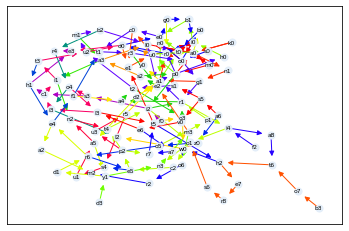

In [25]:
G, paths = random_crossword(words)
draw_colorfully(G,paths)
#nx.draw_spectral(G)

# Making it better: 

There are so many issues.

1. Overarching thing - it's impossible to read the graph. A better graph drawing method is required that makes as many paths followable as possible. 
2. Technical thing - the duplicate letters from a word having multiple letters initially might cause odd behavior at the moment. Their degree initially will be some weird poisson because things are not randomized, and then also later on when things split they might end up causing the degrees of those to become too large. Making splitting iterative would solve this problem.
3. Why do the color of paths look like a gradient?? Maybe can fix this by suitable randomization as well.

In [ ]:
nx.draw_spring(G,node_size = 20,dim=3)